In [37]:
# Banking – Predicting Loan Default (AdaBoost)
# A bank wants to predict whether a customer will default on a loan (Yes/No) based on:
# Monthly_Income (in local currency)
# Loan_Amount (requested loan size)
# Credit_Score (rating between 300–850)
# Since individual decision trees can be weak learners (often shallow stumps), the bank applies AdaBoost.
# AdaBoost sequentially trains trees, giving higher weights to misclassified customers (e.g., those who defaulted but were predicted safe).
# Each new tree focuses more on these “hard cases.”
# Final prediction is a weighted vote across all trees.

In [1]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
df  = pd.read_excel('adaboost_loan_default_dataset (2).xlsx')
df.head()

,Customer_ID,Monthly_Income,Loan_Amount,Credit_Score,Default
0,CUST3001,81422,6899,635,No
1,CUST3002,40795,6267,562,No
2,CUST3003,25860,36551,638,Yes
3,CUST3004,63158,16394,580,No
4,CUST3005,87570,8556,662,Yes


In [3]:
X = df.drop(['Customer_ID', 'Default'], axis=1)
y = df['Default'].map({'No': 0, 'Yes': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dclf = DecisionTreeClassifier(max_depth=1, random_state=42)
adb_clf = AdaBoostClassifier(estimator=dclf, n_estimators=100, random_state=42)

adb_clf.fit(X_train, y_train)

y_pred = adb_clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.6666666666666666


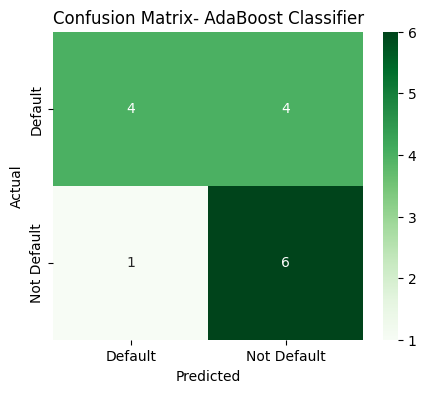

In [4]:
cm = confusion_matrix(y_test, y_pred)
Labels = ['Default', 'Not Default']
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=Labels, yticklabels=Labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix- AdaBoost Classifier')
plt.show()